In [1]:
# Import necessary methods and import data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('Assessment9\SAT Report 2015-2016.csv')
school = df[df['rtype'] == 'S']
# Use D for district data and S for school data


In [2]:
# Select only relevant columns
school = school[['enroll12','NumTstTakr', 'AvgScrRead', 'AvgScrMath', 'AvgScrWrit']]

# Drop rows with null data
school = school.dropna(subset = ['AvgScrRead', 'AvgScrMath', 'AvgScrWrit'])
school.reset_index(drop = True, inplace = True)

# Drop rows with non-numeric values for average scores for reading, writing and math
rows = []
for i in range(len(school)):
    if not school.iloc[i]['AvgScrMath'].isnumeric():
        rows.append(i)
school.drop(rows, axis = 0, inplace = True)
school.reset_index(drop = True, inplace = True)

# Change data type for average scores to integers
columns = ['AvgScrRead', 'AvgScrMath', 'AvgScrWrit']
for col in columns:
    school[col] = school[col].astype(int)

# Added a column of potential factor: percentage of the enrolled grade 12 students who took the test
school['Percentage_of_Enrolled'] = (100*school['NumTstTakr']/school['enroll12'])

# Added a column of total SAT score
school['Average_SAT_Score'] = (school['AvgScrRead']+school['AvgScrMath']+school['AvgScrWrit'])
# Dropped the average scores column
school.drop(columns, axis = 1, inplace = True)

school

,enroll12,NumTstTakr,Percentage_of_Enrolled,Average_SAT_Score
0,88,92,104.545455,1153
1,37,35,94.594595,1714
2,381,255,66.929134,1634
3,52,46,88.461538,1593
4,31,17,54.838710,1090
...,...,...,...,...
1247,300,117,39.000000,1363
1248,249,74,29.718876,1304
1249,38,21,55.263158,1545
1250,202,56,27.722772,1483


In [21]:
# Identify variables and targets
features = school.columns[0:2]
X = school[features].values
y = school['Average_SAT_Score'].values

# Split data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(876, 2)
(376, 2)


In [22]:
# Instantiate the linear regression and fit the model to data
lr = LinearRegression()
lr.fit(X_train, y_train)
actual = y_test

# Linear regression scores
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f'Linear Regression train score: {lr_train_score}')
print(f'Linear Regression test score: {lr_test_score}')
lr_prediction = lr.predict(X_test)

# Instantiate ridge regression and fit data to model
# alpha = 10000, score = 0.02
rr = Ridge(alpha=1)
rr.fit(X_train,y_train)

# Ridge Regression scores
ridge_train_score = rr.score(X_train, y_train)
ridge_test_score = rr.score(X_test, y_test)
print(f'Ridge Regression train score: {ridge_train_score}')
print(f'Ridge Regression test score: {ridge_test_score}')
rr_prediction = rr.predict(X_test)

# Instantiate lasso regression
LassoR = Lasso(alpha = 1)
LassoR.fit(X_train,y_train)

# Lasso regression scores
lasso_train_score =LassoR.score(X_train,y_train)
lasso_test_score =LassoR.score(X_test,y_test)
print(f'Lasso Regression train score: {lasso_train_score}')
print(f'Lasso Regression test score: {lasso_test_score}')
Lasso_prediction = LassoR.predict(X_test)

Linear Regression train score: 0.06376630245116088
Linear Regression test score: 0.11597018746131815
Ridge Regression train score: 0.06376601465997189
Ridge Regression test score: 0.11593051655507935
Lasso Regression train score: 0.06373496326454697
Lasso Regression test score: 0.11482184340826318


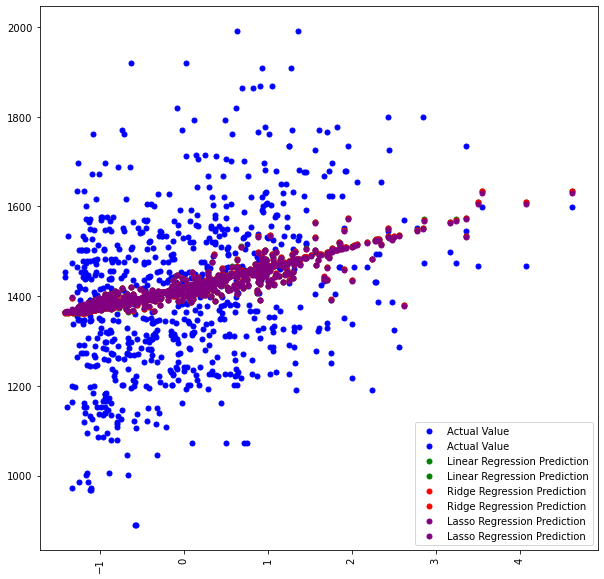

In [23]:
# Visualization
plt.figure(figsize = (10, 10))
plt.plot(X_test,actual,linestyle='none',marker='o',markersize=5,color='blue',label=r'Actual Value')
# plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(X_test,lr_prediction,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression Prediction')
plt.plot(X_test,rr_prediction,linestyle='none',marker='o',markersize=5,color='red',label='Ridge Regression Prediction')
plt.plot(X_test,Lasso_prediction,linestyle='none',marker='o',markersize=5,color='purple',label='Lasso Regression Prediction')
plt.xticks(rotation = 90)
plt.legend()
plt.show()